In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
G = nx.Graph()
G.add_edge('A','B',weight=13,relation='friend')
G.add_edge('B','C',weight=9,relation='family')
G.add_edge('B','D',weight=7,relation='friend')
G.add_edge('E','B',weight=10,relation='friend')
G.add_edge('E','A',weight=1,relation='enemy')
G.add_edge('F','B',weight=13,relation='family')
G.edges(data=True)

EdgeDataView([('A', 'B', {'weight': 13, 'relation': 'friend'}), ('A', 'E', {'weight': 1, 'relation': 'enemy'}), ('B', 'C', {'weight': 9, 'relation': 'family'}), ('B', 'D', {'weight': 7, 'relation': 'friend'}), ('B', 'E', {'weight': 10, 'relation': 'friend'}), ('B', 'F', {'weight': 13, 'relation': 'family'})])

In [3]:
G.add_node('A',role='Trader')
G.add_node('B',role='Analyst')
G.add_node('C',role='Manager')
G.nodes(data=True)

NodeDataView({'A': {'role': 'Trader'}, 'B': {'role': 'Analyst'}, 'C': {'role': 'Manager'}, 'D': {}, 'E': {}, 'F': {}})

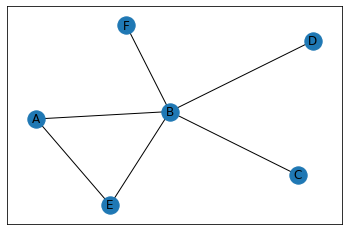

In [4]:
nx.draw_networkx(G, with_labels=True)

In [5]:
from networkx.algorithms import bipartite
B = nx.Graph()
B.add_nodes_from(['A','B','C','D','E'],bipartite=0)
B.add_nodes_from([1,2,3,4],bipartite=1)
B.add_edges_from([('A',1),('B',1),('C',1),('C',3),('D',4),('E',1),('A',2),('E',2)])
bipartite.is_bipartite(B)

True

[('A', 1), ('A', 2), ('B', 1), ('C', 1), ('C', 3), ('D', 4), ('E', 1), ('E', 2)]


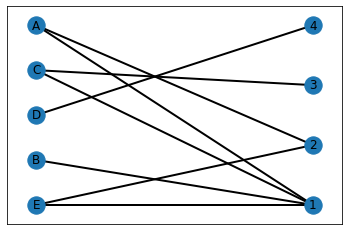

In [6]:
edges = B.edges()
nx.draw_networkx(
    B,
    pos = nx.drawing.layout.bipartite_layout(B, ['A','B','C','D','E']), 
    width = 2)
print(edges)

<h2 style="color:blue;">DOLPHINS NETWORK</h2>
<p> This is a directed social network of bottlenose dolphins. The nodes are the bottlenose dolphins (genus Tursiops) of a bottlenose dolphin community living off 
Doubtful Sound, a fjord in New Zealand (spelled fiord in New Zealand). An edge indicates a frequent association. The dolphins were observed between 1994 and 2001.
The network that has been used is Dolphin network [19]. Dolphin network contains 62 vertices and 159 links. After applying MFLM in Dolphin network, we receive 0.518 
as modularity score and 5 communities.
</p>
<img src = "Dolphin Without Partition.jpeg" alt = "Dolphins Network without Partition">
<p> <i> Network Graph Generated using Gephi </p>

In [7]:
import pandas as pd

read_file = pd.read_excel ("dolphin.xlsx")

read_file.to_csv ("dolphin.csv", index = None, header=True)

df = pd.DataFrame(pd.read_csv("dolphin.csv"))

df

,Node1,Node2
0,0,35
1,0,2
2,0,6
3,0,42
4,0,7
...,...,...
154,52,56
155,53,56
156,53,61
157,55,60


In [8]:
G = nx.Graph()
for index, row in df.iterrows():
    G.add_edge(row['Node1'], row['Node2'])

In [9]:
print(G.nodes)

[0, 35, 2, 6, 42, 7, 37, 1, 30, 36, 9, 11, 50, 19, 20, 21, 12, 22, 3, 47, 4, 27, 5, 45, 56, 61, 26, 53, 23, 28, 31, 32, 38, 8, 46, 48, 17, 40, 10, 51, 55, 13, 15, 18, 25, 14, 59, 24, 39, 58, 60, 16, 29, 57, 44, 33, 54, 34, 41, 49, 43, 52]


In [10]:
print(G.edges)

[(0, 35), (0, 2), (0, 6), (0, 42), (0, 7), (0, 37), (35, 6), (35, 7), (35, 27), (35, 30), (35, 31), (35, 59), (35, 48), (2, 12), (2, 37), (2, 22), (2, 42), (6, 23), (6, 27), (6, 28), (6, 31), (6, 32), (6, 38), (6, 8), (6, 46), (6, 48), (6, 17), (42, 13), (42, 21), (42, 24), (42, 37), (7, 40), (7, 10), (7, 51), (7, 17), (7, 55), (37, 12), (37, 24), (37, 46), (1, 30), (1, 36), (1, 9), (1, 11), (1, 50), (1, 19), (1, 20), (1, 21), (30, 13), (30, 16), (30, 31), (30, 33), (30, 55), (36, 5), (36, 61), (36, 53), (36, 50), (9, 5), (9, 56), (9, 61), (9, 15), (9, 53), (9, 18), (9, 20), (9, 25), (11, 59), (11, 50), (11, 24), (50, 5), (50, 56), (50, 59), (50, 53), (19, 18), (19, 20), (20, 18), (20, 59), (21, 13), (21, 60), (21, 24), (12, 39), (12, 58), (22, 10), (22, 14), (22, 17), (22, 29), (22, 38), (22, 40), (22, 47), (22, 48), (3, 47), (47, 10), (47, 14), (47, 16), (47, 17), (47, 34), (47, 40), (47, 46), (47, 51), (4, 27), (27, 8), (27, 14), (27, 28), (27, 31), (27, 32), (27, 38), (27, 46), (5,

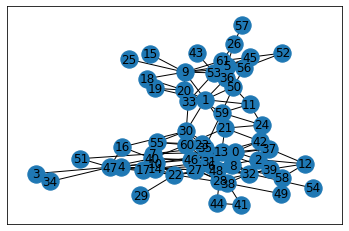

In [11]:
nx.draw_networkx(G, with_labels=True)

## Network Type Prediction in Dolphin Newtork 

The degree distribution does not seem to be a power-law or exponential distribution.


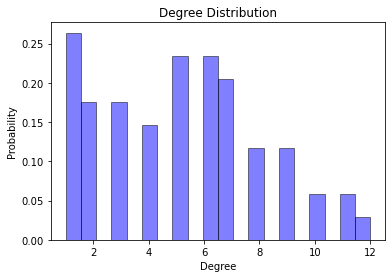

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from scipy.stats import norm, powerlaw, expon
from scipy.optimize import curve_fit

# Load your dataset as a NetworkX graph (replace this with your specific dataset)
G = nx.read_edgelist("dolphin.txt")

# Compute the degree of each node
degrees = dict(G.degree())
degree_values = list(degrees.values())

# Calculate the degree histogram
hist, bin_edges = np.histogram(degree_values, bins=20, density=True)

# Plot the degree distribution
plt.hist(degree_values, bins=20, density=True, alpha=0.5, color='b', edgecolor='black')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Probability")

# Define functions for fitting different distribution types
def power_law(x, a, b):
    return a * (x**b)

def exponential(x, scale):
    return scale * np.exp(-scale * x)

# Fit the degree distribution to different candidate distributions
params_powerlaw, _ = curve_fit(power_law, bin_edges[:-1], hist)
params_exponential, _ = curve_fit(exponential, bin_edges[:-1], hist)

# Determine the type of distribution based on the parameters
alpha_powerlaw = params_powerlaw[1]
scale_exponential = 1 / params_exponential[0]

if alpha_powerlaw > 2.0:
    print("The degree distribution appears to be closer to a power-law (scale-free) distribution.")
elif scale_exponential < 2.0:
    print("The degree distribution appears to be closer to an exponential distribution.")
else:
    print("The degree distribution does not seem to be a power-law or exponential distribution.")

plt.show()

In [13]:
def network_describe(G):
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    degree_sequence = [degree for (node, degree) in G.degree()]
    avg_degree = sum(degree_sequence) / num_nodes
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    eigenvector_centrality = nx.eigenvector_centrality(G)
    avg_clustering_coefficient = nx.average_clustering(G)
    degree_centrality = nx.degree_centrality(G)
    metric_values = list(degree_centrality.values())
    variance = np.var(metric_values)
    list_of_betw_tuples = list(betweenness_centrality.items())
    list_of_eigen_tuples = list(eigenvector_centrality.items())
    list_of_degree_tuples = list(degree_centrality.items())
    print("NETWORK STATISTICS :")
    print("Network Info : ",nx.info(G))
    print("Nodes : ",num_nodes)
    print("Edges : ",num_edges)
    print("Degree Centality : ")
    print(list_of_degree_tuples)
    print("Betweenness Centality : ")
    print(list_of_betw_tuples)
    print("Eigenvector Centality : ")
    print(list_of_eigen_tuples)
    print("Average Clustering Coefficient : ")
    print(avg_clustering_coefficient)
    print("Variance : ")
    print(variance)

In [14]:
network_describe(G)

NETWORK STATISTICS :
Network Info :  Graph with 62 nodes and 159 edges
Nodes :  62
Edges :  159
Degree Centality : 
[('0', 0.09836065573770492), ('40', 0.13114754098360656), ('10', 0.0819672131147541), ('14', 0.19672131147540983), ('47', 0.09836065573770492), ('15', 0.11475409836065574), ('42', 0.09836065573770492), ('1', 0.13114754098360656), ('36', 0.11475409836065574), ('41', 0.0819672131147541), ('17', 0.14754098360655737), ('19', 0.06557377049180328), ('54', 0.11475409836065574), ('26', 0.04918032786885246), ('27', 0.0819672131147541), ('28', 0.0819672131147541), ('2', 0.06557377049180328), ('44', 0.06557377049180328), ('61', 0.04918032786885246), ('3', 0.04918032786885246), ('8', 0.09836065573770492), ('59', 0.0819672131147541), ('4', 0.01639344262295082), ('51', 0.1639344262295082), ('5', 0.06557377049180328), ('56', 0.03278688524590164), ('9', 0.11475409836065574), ('13', 0.13114754098360656), ('57', 0.14754098360655737), ('6', 0.09836065573770492), ('7', 0.0819672131147541), (

<h4> Modularity Score </h4>
<p>Modularity is a measure of the structure of networks or graphs which measures the strength of division of a network into modules (also called groups, clusters or communities). Networks with high modularity have dense connections between the nodes within modules but sparse connections between nodes in different modules. Modularity is often used in optimization methods for detecting community structure in networks. Biological networks, including animal brains, exhibit a high degree of modularity. 
</p>
<img src = "Modularity Score.png" alt = "Modularity formula">

In [15]:
def modularity_score(Gr, i, c):
    E=1
    m=Gr.number_of_edges()
    ki = Gr.degree(i)
    kc = Gr.degree(c)
    p = (ki*kc)/((2*m)**2)
    q = E/(2*m)
    return q-p

In [16]:
def calculate_community_mod(G1,n,a):
   x=[]
   for i in a:
       x.append(list(i))
    
   comm_mod = 0
   for k in range(0,n):
       H=G1.subgraph(x[0])
       for i in x[0]: #
           #neighbours
           i_neighbours = list(H.adj[i])
           for j in i_neighbours:
                comm_mod = comm_mod + modularity_score(H, i, j)
      
   return comm_mod

In [17]:
import networkx as nx

def girvan_newman(G, num_communities):
    communities = [list(G.nodes())]

    while len(communities) < num_communities:
        edge_betweenness = nx.edge_betweenness_centrality(G)

        max_edge_betweenness = max(edge_betweenness.values())
        edges_to_remove = [edge for edge, centrality in edge_betweenness.items() if centrality == max_edge_betweenness]
        G.remove_edges_from(edges_to_remove)

        new_communities = list(nx.connected_components(G))

        if len(new_communities) > len(communities):
            communities = new_communities

    return communities

In [18]:
import matplotlib.pyplot as plt
def draw_communities(G, communities):
    pos = nx.spring_layout(G)
    color_map = ['blue', 'green', 'red', 'orange', 'purple', 'pink', 'yellow', 'crimson', 'saddlebrown', 'magenta']
    
    for i, community in enumerate(communities):
        nx.draw_networkx_nodes(G, pos, nodelist=list(community), node_color=color_map[i], node_size=500)
    
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()
    

<h2 style="color:red;">COMMUNITY DETECTION IN FOOTBALL NETWORK</h2>
<img src = "Dolphin Graph Partition.jpeg" alt = "Football Network Graph">
<p> <i> Network Graph Generated using Gephi </p>

In [19]:
a = girvan_newman(G, 2)
print(a)

[{'37', '11', '2', '34', '24', '8', '47', '52', '45', '0', '59', '18', '49', '12', '16', '21', '50', '38', '55', '14', '30', '43', '23', '29', '44', '42', '28', '46', '36', '3', '40', '15', '51', '58', '33', '35', '20', '10', '61', '53', '4'}, {'54', '56', '26', '9', '48', '25', '22', '1', '57', '17', '7', '39', '41', '6', '5', '32', '60', '27', '13', '19', '31'}]


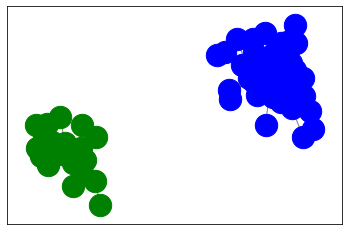

In [20]:
draw_communities(G,a)

In [21]:
mod_G_2 = calculate_community_mod(G,2,a)
print(mod_G_2)

1.5522262435821903


In [22]:
a = girvan_newman(G, 4)
print(a)

[{'42', '28', '2', '10', '47', '30', '0'}, {'37', '11', '34', '24', '8', '52', '45', '59', '18', '49', '12', '16', '21', '38', '50', '55', '14', '43', '23', '29', '44', '46', '36', '3', '40', '15', '51', '58', '33', '35', '20', '4'}, {'54', '56', '26', '9', '48', '25', '22', '1', '57', '17', '7', '39', '41', '6', '5', '32', '60', '27', '13', '19', '31'}, {'61', '53'}]


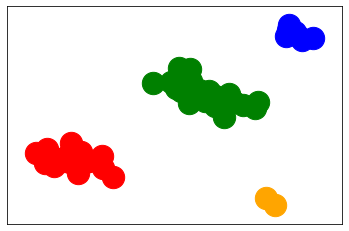

In [23]:
draw_communities(G,a)

In [24]:
mod_G_4 = calculate_community_mod(G,4,a)
print(mod_G_4)

1.6249999999999993


In [25]:
a = girvan_newman(G, 6)
print(a)

[{'42', '28', '2', '10', '47', '30', '0'}, {'37', '34', '8', '52', '59', '49', '12', '16', '38', '50', '14', '43', '44', '46', '36', '3', '40', '58', '33', '20'}, {'11', '18', '35', '24', '21', '55', '4', '23', '15', '29', '45', '51'}, {'54', '56', '26', '9', '48', '25', '22', '1', '57', '17', '7', '39', '41', '6', '5', '27', '13', '19', '31'}, {'61', '53'}, {'32', '60'}]


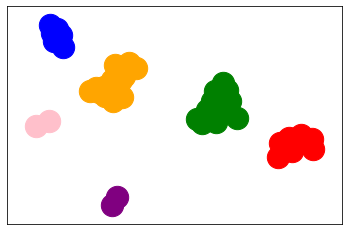

In [26]:
draw_communities(G,a)

In [27]:
mod_G_6 = calculate_community_mod(G,6,a)
print(mod_G_6)

2.4374999999999987


In [28]:
a = girvan_newman(G, 10)
print(a)

[{'42', '28', '2', '10', '47', '30', '0'}, {'37', '33', '49', '46', '20', '34', '16', '36', '43', '44', '38', '50', '14', '40', '52'}, {'11', '18', '35', '24', '21', '55', '4', '23', '15', '29', '45', '51'}, {'25', '7', '26', '1', '19', '27'}, {'54', '57', '39', '13', '41', '6', '56', '5', '9', '48'}, {'31', '17', '22'}, {'61', '53'}, {'8', '59', '3'}, {'32', '60'}, {'12'}, {'58'}]


IndexError: list index out of range

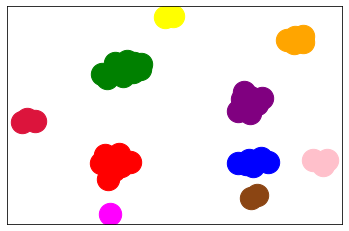

In [29]:
draw_communities(G,a)

In [30]:
mod_G_10 = calculate_community_mod(G,10,a)
print(mod_G_10)

4.062499999999998


In [31]:
from networkx.algorithms import community
from operator import itemgetter
communities = community.greedy_modularity_communities(G)

In [32]:
betweenness_dict = nx.betweenness_centrality(G) 
eigenvector_dict = nx.eigenvector_centrality(G) 

nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

In [33]:
modularity_dict = {} 
for i,c in enumerate(communities): 
    for name in c: 
        modularity_dict[name]=i

nx.set_node_attributes(G, modularity_dict, 'modularity')
class0 = [n for n in G.nodes() if G.nodes[n]['modularity'] == 0]

class0_eigenvector = {n:G.nodes[n]['eigenvector'] for n in class0}

class0_sorted_by_eigenvector = sorted(class0_eigenvector.items(), key=itemgetter(1), reverse=True)

for i,c in enumerate(communities):
    if len(c) > 2: 
        print('Class '+str(i)+':', list(c)) 
        print('\n')

Class 0: ['37', '49', '33', '46', '20', '34', '16', '36', '40', '44', '50', '38', '14', '43', '52']


Class 1: ['11', '18', '35', '24', '21', '55', '4', '23', '15', '29', '45', '51']


Class 2: ['54', '57', '39', '13', '41', '56', '6', '5', '9', '48']


Class 3: ['42', '10', '28', '47', '2', '0', '30']


Class 4: ['25', '7', '19', '1', '26', '27']


Class 5: ['59', '8', '3']


Class 6: ['31', '17', '22']




<h2 style="color:Green;">FOOTBALL NETWORK</h2>
<p>The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  
</p>
<img src = "football graph without partition.png" alt = "Football Network Graph">
<p> <i> Network Graph Generated using Gephi </p>

In [34]:
import pandas as pd

read_file = pd.read_excel ("football.xlsx")

read_file.to_csv ("football.csv", index = None, header=True)

df = pd.DataFrame(pd.read_csv("football.csv"))

df

,Node1,Node2
0,0,1
1,0,44
2,0,49
3,0,77
4,0,42
...,...,...
608,103,114
609,104,108
610,106,108
611,106,107


In [35]:
G = nx.Graph()
for index, row in df.iterrows():
    G.add_edge(row['Node1'], row['Node2'])

In [36]:
print(G.nodes)

[0, 1, 44, 49, 77, 42, 7, 104, 23, 51, 31, 105, 108, 46, 6, 8, 55, 12, 103, 68, 33, 35, 4, 2, 60, 113, 10, 5, 85, 87, 13, 95, 98, 72, 3, 27, 71, 20, 22, 41, 48, 57, 76, 96, 114, 26, 37, 39, 62, 66, 69, 92, 109, 38, 50, 63, 83, 79, 101, 18, 74, 94, 9, 67, 107, 88, 102, 11, 82, 29, 30, 80, 90, 91, 15, 75, 112, 61, 32, 36, 81, 14, 56, 59, 64, 86, 97, 93, 16, 54, 78, 106, 111, 17, 24, 28, 70, 89, 110, 19, 43, 45, 47, 53, 21, 25, 99, 34, 84, 65, 52, 73, 40, 58, 100]


In [37]:
print(G.edges)

[(0, 1), (0, 44), (0, 49), (0, 77), (0, 42), (0, 7), (0, 104), (0, 23), (0, 51), (0, 31), (0, 105), (0, 108), (1, 42), (1, 46), (1, 6), (1, 8), (1, 55), (1, 12), (1, 103), (1, 68), (1, 33), (1, 35), (1, 4), (44, 4), (44, 26), (44, 37), (44, 39), (44, 43), (44, 54), (44, 92), (44, 109), (44, 66), (44, 107), (49, 7), (49, 11), (49, 23), (49, 31), (49, 36), (49, 60), (49, 104), (49, 51), (49, 108), (49, 81), (77, 17), (77, 24), (77, 28), (77, 35), (77, 67), (77, 75), (77, 111), (77, 78), (77, 83), (77, 101), (42, 6), (42, 8), (42, 12), (42, 26), (42, 33), (42, 46), (42, 55), (42, 103), (7, 104), (7, 13), (7, 23), (7, 31), (7, 51), (7, 79), (7, 85), (7, 101), (7, 108), (7, 18), (104, 11), (104, 23), (104, 30), (104, 31), (104, 51), (104, 76), (104, 93), (104, 108), (23, 79), (23, 47), (23, 95), (23, 24), (23, 51), (23, 31), (23, 108), (51, 31), (51, 50), (51, 93), (51, 79), (51, 108), (31, 15), (31, 30), (31, 91), (31, 105), (31, 108), (105, 13), (105, 32), (105, 36), (105, 60), (105, 61),

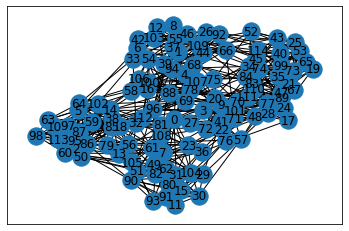

In [38]:
nx.draw_networkx(G, with_labels=True)

## Network Type Prediction in Football Newtork 

The degree distribution appears to be closer to a power-law (scale-free) distribution.


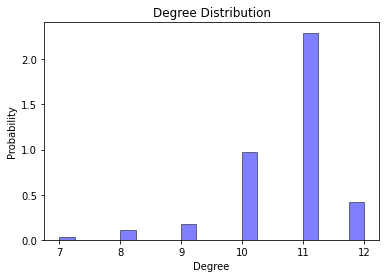

In [39]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from scipy.stats import norm, powerlaw, expon
from scipy.optimize import curve_fit

# Load your dataset as a NetworkX graph (replace this with your specific dataset)
G = nx.read_edgelist("football.txt")

# Compute the degree of each node
degrees = dict(G.degree())
degree_values = list(degrees.values())

# Calculate the degree histogram
hist, bin_edges = np.histogram(degree_values, bins=20, density=True)

# Plot the degree distribution
plt.hist(degree_values, bins=20, density=True, alpha=0.5, color='b', edgecolor='black')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Probability")

# Define functions for fitting different distribution types
def power_law(x, a, b):
    return a * (x**b)

def exponential(x, scale):
    return scale * np.exp(-scale * x)

# Fit the degree distribution to different candidate distributions
params_powerlaw, _ = curve_fit(power_law, bin_edges[:-1], hist)
params_exponential, _ = curve_fit(exponential, bin_edges[:-1], hist)

# Determine the type of distribution based on the parameters
alpha_powerlaw = params_powerlaw[1]
scale_exponential = 1 / params_exponential[0]

if alpha_powerlaw > 2.0:
    print("The degree distribution appears to be closer to a power-law (scale-free) distribution.")
elif scale_exponential < 2.0:
    print("The degree distribution appears to be closer to an exponential distribution.")
else:
    print("The degree distribution does not seem to be a power-law or exponential distribution.")

plt.show()

In [40]:
network_describe(G)

NETWORK STATISTICS :
Network Info :  Graph with 115 nodes and 613 edges
Nodes :  115
Edges :  613
Degree Centality : 
[('0', 0.10526315789473684), ('1', 0.10526315789473684), ('35', 0.09649122807017543), ('4', 0.09649122807017543), ('65', 0.09649122807017543), ('33', 0.08771929824561403), ('104', 0.10526315789473684), ('9', 0.09649122807017543), ('16', 0.09649122807017543), ('41', 0.08771929824561403), ('23', 0.09649122807017543), ('90', 0.07894736842105263), ('93', 0.08771929824561403), ('37', 0.09649122807017543), ('103', 0.08771929824561403), ('105', 0.08771929824561403), ('45', 0.09649122807017543), ('109', 0.09649122807017543), ('89', 0.09649122807017543), ('57', 0.08771929824561403), ('25', 0.09649122807017543), ('27', 0.09649122807017543), ('101', 0.08771929824561403), ('2', 0.10526315789473684), ('64', 0.09649122807017543), ('3', 0.10526315789473684), ('100', 0.09649122807017543), ('6', 0.10526315789473684), ('72', 0.09649122807017543), ('74', 0.09649122807017543), ('13', 0.096

<h2 style="color:red;">COMMUNITY DETECTION IN FOOTBALL NETWORK</h2>
<img src = "football final graph.png" alt = "Football Network Graph">
<p> <i> Network Graph Generated using Gephi </p>

In [41]:
a = girvan_newman(G, 2)
print(a)

[{'98', '11', '2', '24', '100', '8', '83', '84', '67', '74', '47', '72', '9', '73', '0', '52', '114', '102', '22', '49', '16', '82', '21', '50', '77', '23', '111', '28', '104', '110', '90', '7', '41', '69', '46', '5', '78', '88', '68', '39', '3', '6', '64', '32', '60', '40', '15', '51', '107', '81', '13', '108', '10', '106', '4', '53', '93'}, {'37', '54', '103', '56', '34', '89', '26', '91', '113', '63', '86', '105', '65', '45', '48', '99', '25', '85', '87', '59', '18', '66', '12', '1', '38', '79', '62', '55', '30', '109', '14', '43', '44', '29', '71', '42', '75', '57', '17', '94', '92', '36', '76', '70', '112', '80', '27', '58', '97', '96', '33', '35', '20', '61', '19', '101', '31', '95'}]


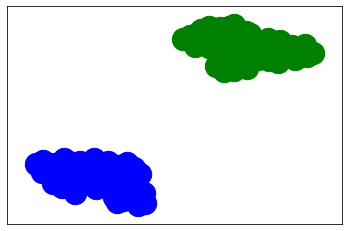

In [42]:
draw_communities(G,a)

In [43]:
mod_G_2 = calculate_community_mod(G,2,a)
print(mod_G_2)

1.6448035815951454


In [44]:
a = girvan_newman(G, 4)
print(a)

[{'98', '11', '24', '8', '83', '84', '67', '74', '72', '9', '73', '0', '52', '114', '102', '22', '49', '16', '82', '21', '50', '77', '23', '111', '28', '104', '110', '90', '7', '41', '69', '46', '5', '78', '88', '68', '3', '40', '51', '107', '81', '108', '10', '4', '53', '93'}, {'37', '103', '56', '89', '91', '113', '63', '86', '105', '65', '45', '48', '87', '25', '59', '66', '1', '79', '62', '55', '30', '109', '44', '29', '75', '57', '17', '94', '92', '76', '70', '112', '80', '27', '58', '97', '96', '33', '35', '20', '19', '101', '95'}, {'39', '13', '6', '2', '100', '32', '64', '47', '60', '106', '15'}, {'42', '54', '18', '12', '34', '26', '36', '38', '61', '14', '43', '31', '85', '71', '99'}]


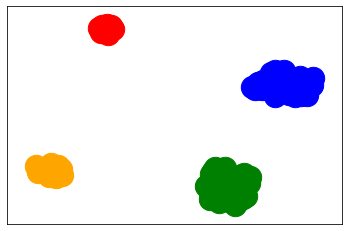

In [45]:
draw_communities(G,a)

In [46]:
mod_G_4 = calculate_community_mod(G,4,a)
print(mod_G_4)

3.1349213029206444


In [47]:
a = girvan_newman(G, 6)
print(a)

[{'11', '24', '8', '83', '67', '9', '73', '0', '114', '22', '49', '16', '21', '50', '77', '23', '111', '28', '104', '110', '90', '7', '41', '69', '46', '88', '78', '68', '51', '108', '4', '53', '93'}, {'37', '25', '33', '80', '103', '35', '94', '89', '1', '29', '79', '19', '101', '55', '109', '105', '45', '30'}, {'56', '113', '91', '63', '86', '65', '48', '87', '59', '66', '62', '44', '75', '57', '17', '92', '76', '70', '112', '27', '58', '97', '96', '20', '95'}, {'39', '13', '6', '2', '100', '32', '64', '47', '60', '106', '15'}, {'98', '107', '81', '102', '5', '3', '82', '84', '74', '10', '72', '40', '52'}, {'42', '54', '18', '12', '34', '26', '36', '38', '61', '14', '43', '31', '85', '71', '99'}]


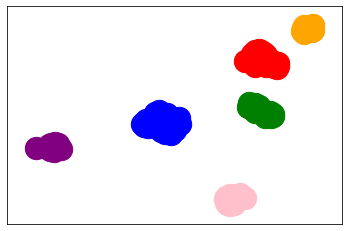

In [48]:
draw_communities(G,a)

In [49]:
a = girvan_newman(G, 6)
print(a)

[{'11', '24', '8', '83', '67', '9', '73', '0', '114', '22', '49', '16', '21', '50', '77', '23', '111', '28', '104', '110', '90', '7', '41', '69', '46', '88', '78', '68', '51', '108', '4', '53', '93'}, {'37', '25', '33', '80', '103', '35', '94', '89', '1', '29', '79', '19', '101', '55', '109', '105', '45', '30'}, {'56', '113', '91', '63', '86', '65', '48', '87', '59', '66', '62', '44', '75', '57', '17', '92', '76', '70', '112', '27', '58', '97', '96', '20', '95'}, {'39', '13', '6', '2', '100', '32', '64', '47', '60', '106', '15'}, {'98', '107', '81', '102', '5', '3', '82', '84', '74', '10', '72', '40', '52'}, {'42', '54', '18', '12', '34', '26', '36', '38', '61', '14', '43', '31', '85', '71', '99'}]


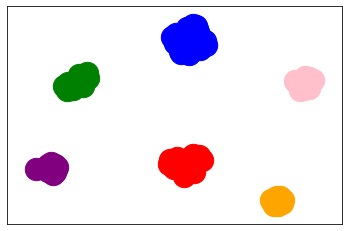

In [50]:
draw_communities(G,a)

In [51]:
mod_G_6 = calculate_community_mod(G,6,a)
print(mod_G_6)

4.293072330973211


In [52]:
a = girvan_newman(G, 10)
print(a)

[{'104', '22', '7', '111', '41', '16', '8', '78', '68', '108', '21', '77', '4', '9', '23', '0', '93', '51'}, {'37', '25', '33', '103', '89', '1', '109', '105', '45'}, {'35', '80', '94', '79', '19', '101', '30', '55', '29'}, {'97', '58', '96', '17', '59', '20', '56', '113', '62', '63', '76', '27', '70', '95', '65', '87'}, {'28', '11', '90', '69', '24', '50'}, {'75', '57', '66', '92', '91', '112', '44', '86', '48'}, {'39', '13', '6', '2', '100', '32', '64', '47', '60', '106', '15'}, {'98', '107', '81', '102', '5', '3', '82', '84', '74', '10', '72', '40', '52'}, {'42', '54', '18', '12', '34', '26', '36', '38', '61', '14', '43', '31', '85', '71', '99'}, {'114', '110', '49', '46', '88', '83', '67', '53', '73'}]


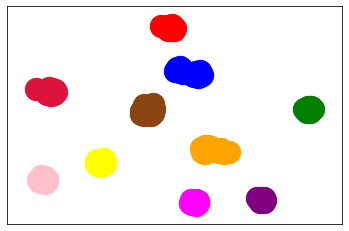

In [53]:
draw_communities(G,a)

In [54]:
mod_G_10 = calculate_community_mod(G,10,a)
print(mod_G_10)

5.215111111111103


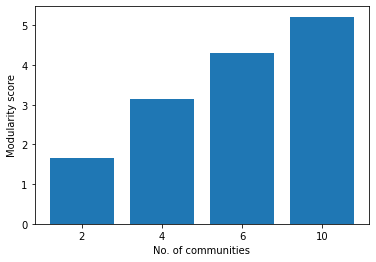

In [55]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(["2", "4", "6", "10"])
y = np.array([mod_G_2, mod_G_4, mod_G_6, mod_G_10])

plt.xlabel("No. of communities") 
plt.ylabel("Modularity score")

plt.bar(x,y)
plt.show()

<h2 style="color:red;">KARATE CLUB NETWORK</h2>
<p>Zachary's karate club is a social network of a university karate club, described in the paper "An Information Flow Model for Conflict and Fission in Small Groups" by Wayne W. Zachary. The network became a popular example of community structure in networks after its use by Michelle Girvan and Mark Newman in 2002.[1]
</p>
<img src = "karate without partition.png" alt = "Zachary's karate Network Graph">
<p> <i> Network Graph Generated using Gephi </p>

In [56]:
import pandas as pd

read_file = pd.read_excel ("Karate.xlsx")

read_file.to_csv ("Karate.csv", index = None, header=True)

df = pd.DataFrame(pd.read_csv("Karate.csv"))

df

,Node1,Node2
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
73,30,33
74,30,32
75,31,32
76,31,33


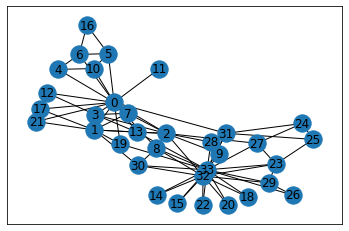

In [57]:
G = nx.Graph()
for index, row in df.iterrows():
    G.add_edge(row['Node1'], row['Node2'])
    
nx.draw_networkx(G, with_labels=True)

## Network Type Prediction in Karate Club Newtork 

The degree distribution does not seem to be a power-law or exponential distribution.


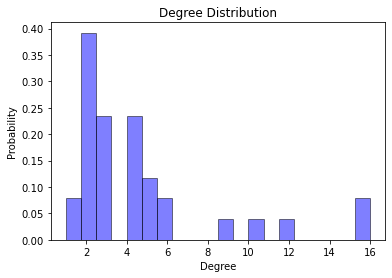

In [58]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from scipy.stats import norm, powerlaw, expon
from scipy.optimize import curve_fit

# Load your dataset as a NetworkX graph (replace this with your specific dataset)
G = nx.read_edgelist("karate.txt")

# Compute the degree of each node
degrees = dict(G.degree())
degree_values = list(degrees.values())

# Calculate the degree histogram
hist, bin_edges = np.histogram(degree_values, bins=20, density=True)

# Plot the degree distribution
plt.hist(degree_values, bins=20, density=True, alpha=0.5, color='b', edgecolor='black')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Probability")

# Define functions for fitting different distribution types
def power_law(x, a, b):
    return a * (x**b)

def exponential(x, scale):
    return scale * np.exp(-scale * x)

# Fit the degree distribution to different candidate distributions
params_powerlaw, _ = curve_fit(power_law, bin_edges[:-1], hist)
params_exponential, _ = curve_fit(exponential, bin_edges[:-1], hist)

# Determine the type of distribution based on the parameters
alpha_powerlaw = params_powerlaw[1]
scale_exponential = 1 / params_exponential[0]

if alpha_powerlaw > 2.0:
    print("The degree distribution appears to be closer to a power-law (scale-free) distribution.")
elif scale_exponential < 2.0:
    print("The degree distribution appears to be closer to an exponential distribution.")
else:
    print("The degree distribution does not seem to be a power-law or exponential distribution.")

plt.show()

In [59]:
network_describe(G)

NETWORK STATISTICS :
Network Info :  Graph with 34 nodes and 77 edges
Nodes :  34
Edges :  77
Degree Centality : 
[('0', 0.48484848484848486), ('9', 0.15151515151515152), ('14', 0.15151515151515152), ('15', 0.06060606060606061), ('16', 0.06060606060606061), ('19', 0.06060606060606061), ('20', 0.09090909090909091), ('21', 0.06060606060606061), ('23', 0.06060606060606061), ('24', 0.15151515151515152), ('27', 0.06060606060606061), ('28', 0.12121212121212122), ('29', 0.09090909090909091), ('30', 0.12121212121212122), ('31', 0.12121212121212122), ('32', 0.18181818181818182), ('33', 0.36363636363636365), ('2', 0.2727272727272727), ('1', 0.48484848484848486), ('3', 0.30303030303030304), ('4', 0.18181818181818182), ('5', 0.09090909090909091), ('6', 0.12121212121212122), ('7', 0.12121212121212122), ('8', 0.12121212121212122), ('10', 0.030303030303030304), ('11', 0.09090909090909091), ('12', 0.030303030303030304), ('13', 0.06060606060606061), ('17', 0.06060606060606061), ('18', 0.060606060606060

<h2 style="color:purple;">LES MISERABLES NETWORK</h2>
<img src = "Les Miserables without partition.jpeg" alt = "Les Miserables Network Graph">
<p> <i> Network Graph Generated using Gephi </p>

In [60]:
import pandas as pd

read_file = pd.read_excel ("lesmis.xlsx")

read_file.to_csv ("lesmis.csv", index = None, header=True)

df = pd.DataFrame(pd.read_csv("lesmis.csv"))

df

,Node1,Node2
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
249,69,75
250,70,71
251,70,75
252,71,75


In [61]:
G = nx.Graph()
for index, row in df.iterrows():
    G.add_edge(row['Node1'], row['Node2'])

In [62]:
print(G.edges)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 11), (2, 3), (2, 11), (3, 11), (11, 10), (11, 12), (11, 13), (11, 14), (11, 15), (11, 23), (11, 24), (11, 25), (11, 26), (11, 27), (11, 28), (11, 29), (11, 31), (11, 32), (11, 33), (11, 34), (11, 35), (11, 36), (11, 37), (11, 38), (11, 43), (11, 44), (11, 48), (11, 49), (11, 51), (11, 55), (11, 58), (11, 64), (11, 68), (11, 69), (11, 70), (11, 71), (11, 72), (12, 23), (23, 16), (23, 17), (23, 18), (23, 19), (23, 20), (23, 21), (23, 22), (23, 24), (23, 25), (23, 27), (23, 29), (23, 30), (23, 31), (24, 25), (24, 26), (24, 27), (24, 41), (24, 42), (24, 50), (24, 68), (24, 69), (24, 70), (25, 26), (25, 27), (25, 39), (25, 40), (25, 41), (25, 42), (25, 48), (25, 55), (25, 68), (25, 69), (25, 70), (25, 71), (25, 75), (26, 16), (26, 27), (26, 43), (26, 49), (26, 51), (26, 54), (26, 55), (26, 72), (27, 28), (27, 29), (27, 31), (27, 33), (27, 43), (27, 48), (27, 58), (27, 68), (27, 69), (27, 70), (27, 71), (27, 72), (2

<h2 style="color:red;">PARTITIONED LES MISERABLES NETWORK</h2>
<img src = "Les_Miserables.jpeg" alt = "Les Miserables Network Graph">
<p> <i> Network Graph Generated using Gephi </p>

In [63]:
network_describe(G)

NETWORK STATISTICS :
Network Info :  Graph with 77 nodes and 254 edges
Nodes :  77
Edges :  254
Degree Centality : 
[(0, 0.13157894736842105), (1, 0.013157894736842105), (2, 0.039473684210526314), (3, 0.039473684210526314), (4, 0.013157894736842105), (5, 0.013157894736842105), (6, 0.013157894736842105), (7, 0.013157894736842105), (8, 0.013157894736842105), (9, 0.013157894736842105), (11, 0.47368421052631576), (10, 0.013157894736842105), (12, 0.02631578947368421), (13, 0.013157894736842105), (14, 0.013157894736842105), (15, 0.013157894736842105), (23, 0.19736842105263158), (24, 0.14473684210526316), (25, 0.21052631578947367), (26, 0.14473684210526316), (27, 0.22368421052631576), (28, 0.05263157894736842), (29, 0.10526315789473684), (31, 0.05263157894736842), (32, 0.013157894736842105), (33, 0.02631578947368421), (34, 0.07894736842105263), (35, 0.07894736842105263), (36, 0.07894736842105263), (37, 0.07894736842105263), (38, 0.07894736842105263), (43, 0.039473684210526314), (44, 0.0263157

The degree distribution does not seem to be a power-law or exponential distribution.


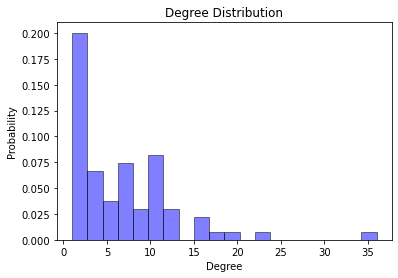

In [64]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from scipy.stats import norm, powerlaw, expon
from scipy.optimize import curve_fit

# Load your dataset as a NetworkX graph (replace this with your specific dataset)
G = nx.read_edgelist("lesmis (1).txt")

# Compute the degree of each node
degrees = dict(G.degree())
degree_values = list(degrees.values())

# Calculate the degree histogram
hist, bin_edges = np.histogram(degree_values, bins=20, density=True)

# Plot the degree distribution
plt.hist(degree_values, bins=20, density=True, alpha=0.5, color='b', edgecolor='black')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Probability")

# Define functions for fitting different distribution types
def power_law(x, a, b):
    return a * (x**b)

def exponential(x, scale):
    return scale * np.exp(-scale * x)

# Fit the degree distribution to different candidate distributions
params_powerlaw, _ = curve_fit(power_law, bin_edges[:-1], hist)
params_exponential, _ = curve_fit(exponential, bin_edges[:-1], hist)

# Determine the type of distribution based on the parameters
alpha_powerlaw = params_powerlaw[1]
scale_exponential = 1 / params_exponential[0]

if alpha_powerlaw > 2.0:
    print("The degree distribution appears to be closer to a power-law (scale-free) distribution.")
elif scale_exponential < 2.0:
    print("The degree distribution appears to be closer to an exponential distribution.")
else:
    print("The degree distribution does not seem to be a power-law or exponential distribution.")

plt.show()